<div style="text-align: center; margin: 50px">

<h1 style="color: darkblue; background-color: white; text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Week 16 lab - Intro to Qiskit</h3>
</div>

## Overview 
1. [Introduction](#part1)
2. [Importing Qiskit](#part2)
3. [Building your first quantum circuit](#part3)
4. [Visualizing a Circuit](#part4)
5. [Adding gates](#part5)
6. [Simulating gates](#part6)

<a id="part1"></a>
## Introduction

Last semester, you were introduced to Python. We also discussed **python libraries**, which are like apps on a smartphone - they extend the capabilities of Python. We looked at one library in detail - numpy, and we saw how to use numpy arrays to define vectors, matrices, and perform operations with them.

Today, we will start using another libary, called Qiskit.

Qiskit [kiss-kit] is an open source SDK (software development kit) for working with quantum computers at the level of pulses, circuits and application modules. Qiskit accelerates the development of quantum applications by providing the complete set of tools needed for interacting with quantum systems and simulators.

For convenience we are going to use **Jupyter notebooks** to review the basics of the qiskit code. Jupeyter notebooks are an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media. For more details on Jupyter Notebooks, visit the [Jupyter](https://jupyter.org/) website.

Each block in a Jupyter notebook is called a **cell**. There are several types of cells in a notebook - you can see all the types in the menu above. This is a markdown cell, because we only want to include text in it. A cell in which we want code will be a code cell. One of the advantages of using a notebook is that you don't need to run all your cells at once - you can run one cell at a time, and break up your code into mananageable chunks. 

Writing code this way also makes debugging easy - you just have to debug one cell at a time! This notebooks is written out to execute correctly and should have no bugs. Whenever you want to make a change, make sure you're following the right syntax. If you do get bugs, google them! Someone else has probably seen the same bug and figured out how to solve it. A common bug in Jupyter notebooks is that you might forget to run earlier cells that define variables/functions that are being used in the current cell.

Below are some useful commands to work with these notebooks. Try them out!

#### Useful commands

| Function | Keyboard Shortcut | Menu Tools |
|:---------|:------------------|:-----------|
| Save notebook | Esc + s | File → Save and Checkpoint |
| Create new cell | Esc + a (above), Esc + b (below) | Insert→ cell above Insert → cell below |
| Run Cell | Ctrl + enter | Cell → Run Cell |
| Copy Cell | c | Copy Key |
| Paste Cell | v | Paste Key |
| Find and replace on your code but not the outputs | Esc + f | not applicable |
| Merge multiple cells | Shift + M | not applicable |

<a id="part2"></a>
## Importing Qiskit

Just like we had imported numpy, we will first need to import all the qiskit tools we will need. The advantage of using IBM Q Experience is that qiskit is 'built-in', so we don't need to explicitly import it. We just import the specific qiskit tools we need.

In [1]:
from qiskit import __qiskit_version__, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector

ModuleNotFoundError: ignored

The fundamental package of Qiskit is **Terra** that provides the basic building blocks necessary to program quantum computers. It is the foundation on which the rest of Qiskit is built. `QuantumCircuit` and `execute` are part of Terra and are core elements to start working with Qiskit. [Here](https://qiskit.org/documentation/apidoc/terra.html) you can learn more about this API.

**Aer** provides high-performance quantum computing simulators with realistic noise models.

The `qiskit.visualization` subpackage helps us to visualize what is being done with Qiskit, more detail [here](https://qiskit.org/documentation/apidoc/visualization.html).

Here you can learn more about [The Qiskit Elements](https://qiskit.org/documentation/the_elements.html).

In order to verify which version you are running you can use `__qiskit_version__`. Using qiskit on IBM QE ensures that you always have the latest version. However, if you're running qiskit locally, it is always good to check if your version is up to date. IBM frequently adds new functions/capabilities to the different qiskit libraries, and it is good to be up-to-date.

In [ ]:
__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

<a id="part3"></a>
## Building your first quantum circuit

The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on either a simulator or an actual quantum computer. After the jobs have been run, the data is collected and postprocessed depending on the desired output.

We start by creating a `QuantumCircuit` made up of one qubit. Just like the functions we had learnt in semester 1, the `QuantumCircuit` function needs inputs. The input we give to the function in the code below is the number of qubits in the circuit.

In [ ]:
circ = QuantumCircuit(1)          # Create a quantum circuit with one qubit

In our quantum circuits, our qubits **start out in the state $|0\rangle$ by default**.

Note that you can name your circuit whatever you like, as long as you use that name consistently.

<a id="part4"></a>
## Visualizing a Circuit

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks. You can give this function an optional input to tell it the style in which you want to draw the circuit. The most commonly used style is `mpl` (short for `matplotlib`), but other styles you can use are `text`, `latex`, and `latex_source`. More info [here](https://qiskit.org/documentation/stubs/qiskit.visualization.circuit_drawer.html).

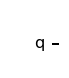

In [ ]:
circ.draw('mpl')                  # Let's view our circuit

<a id="part5"></a>

1.   List item
2.   List item


## Adding gates to create Bell states

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. In the rest of this lab, we will show an example of a quantum circuit that makes a two-qubit state called a **Bell state**, a special type of two-qubit quantum state. There are four Bell states:

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)$$

These states are examples of **two-qubit entangled states**. In this lab, we will create the $|\phi^+\rangle$ state, and in this week's homework, you will have a chance to create some of the others.

#### Statevectors
Every quantum state can be represented by a vector, which is called the **statevector**. We have seen that 1-qubit states are represented by a statevector with 2 entries. For example, the state $|\psi\rangle=(|0\rangle+|1\rangle)/\sqrt{2}$ is represented by the statevector $|\psi\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1\end{pmatrix}$. Here, the first (top) entry in the vector is the amplitude of the $|0\rangle$ state, and the second (bottom) entry is the amplitude of the $|1\rangle$ state.

Similarly, 2-qubit states can also be represented with statevectors. Since we have two qubits, **we now have 4 basis states**, corresponding to the **4 possible outputs** we can get when we measure the 2 qubits: $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$. Therefore, the **statevector for a 2-qubit state has 4 entries**. For example, the state $|\psi\rangle=\frac{1}{2}|00\rangle+\frac{1}{\sqrt{2}}|01\rangle+\frac{1}{2\sqrt{2}}|10\rangle-\frac{1}{2\sqrt{2}}|11\rangle$ would be represented by the statevector $|\psi\rangle=\begin{pmatrix} \frac{1}{2} \\ \frac{1}{\sqrt{2}} \\ \frac{1}{2\sqrt{2}} \\ -\frac{1}{2\sqrt{2}}\end{pmatrix}$. Here, the first entry is the amplitude of the $|00\rangle$ state, the second entry is the amplitude of the $|01\rangle$ state, the third entry is the amplitude of the $|10\rangle$ state, and the fourth entry is the amplitude of the $|11\rangle$.

Next, we will create a special 2-qubit state which you have seen before.

Here's what we are going to do, to create such a state. we start with a two-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make this Bell state, we apply the following gates: 

- A Hadamard gate H on qubit 0, which puts it into the superposition state $(|0\rangle+|1\rangle)/\sqrt{2}$. 
- A controlled-Not operation (CX) between qubit 0 and qubit 1. 

Don't worry if these steps are unfamiliar - we will learn more about these states in coming weeks! Today, we are just using this state as an example to learn how to create and run quantum circuits.

On an ideal quantum computer, the state produced by running this circuit would be the Bell state above.

We are now going to create the circuit and add gates to it one by one.

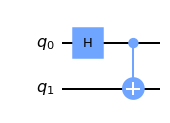

In [ ]:
# Create a Quantum Circuit acting on a quantum register of two qubits
circ_bell = QuantumCircuit(2)

# Add a H gate on qubit 0, putting this qubit in superposition.
circ_bell.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting the qubits in a Bell state.
circ_bell.cx(0, 1)

# Visualize the circuit
circ_bell.draw('mpl')

In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

**Questions:**
1. In circ_bell = QuantumCircuit(2) , what does the 2 represent? <br>
    a. Number of circuits <br>
    b. Number of qubits <br>
    c. Number of gates <br>
    d. Something else <br>
2. In circ_bell.h(0), what does the 0 represent? <br>
    a. Number of gates <br>
    b. The qubit on which the H gate is applied <br>
    c. The outcome of a measurement of the state of the qubit <br>
    d. The initial state of the qubit <br>
    e. Something else <br>
3. In circ_bell.cx(0, 1), what does the 0,1 represent? <br>
    a. The control qubit and target qubit of the CNOT, respectively <br>
    b. The target qubit and control qubit of the CNOT, respectively <br>
    c. The possible values of measuring the qubit <br>
    d. The value of the qubit before and after the gate, respectively <br>
    e. Somethign else <br>

<a id="part6"></a>
## Simulating gates

We can then use one of Qiskit’s simulators to view the resulting state of our circuit. Qiskit Aer is our package for simulating quantum circuits. It provides many different **backends** for doing a simulation. To begin with we will use the **statevector simulator**.
Here are the possible simulators available through Aer:
1. `QasmSimulator` Allows ideal and noisy multi-shot execution of qiskit circuits and returns counts or memory.

2. `StatevectorSimulator` Allows ideal single-shot execution of qiskit circuits and returns the final statevector of the simulator after application.

3. `UnitarySimulator` Allows ideal single-shot execution of qiskit circuits and returns the final unitary matrix of the circuit itself. Note that the circuit cannot contain measure or reset operations for this backend.

You'll notice that we did not add classical bits to our circuit, unlike in the lecture. This is because we're using `StatevectorSimulator`, which returns the final statevector of the circuit using linear algebra. It does not return the result of a measurement, so we don't need to add any classical bits or measurements! In lecture we had used `QasmSimulator`, which is intended to return the results of measurements, and therefore we had to add classical bits and measurements to our circuit.

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

The most common backend in Qiskit Aer is the `statevector_simulator`. This simulator returns the **quantum state**, which is a complex vector of dimension $2^n$, where $n$ is the number of qubits (so be careful using this as it will quickly get too large to run on your machine).

Now that we have chosen the backend, it’s time to compile and run the quantum circuit. Qiskit provides the `execute` function for this. `execute` returns a `job` object that encapsulates information about the job submitted to the backend.

In [ ]:
# Create a Quantum Program for execution. This statement runs the circuit. We have to ive execute two inputs
# the circuit we want to run (circ_bell), and the simulator we want to use (backend = statevector simulator). 
job = execute(circ_bell, backend)

**Question:** In the above statement, what are the inputs to the `execute` function? (More than one may be correct) <br>
    a. No inputs<br>
    b. circ_bell<br>
    c. backend<br>
    d. None of these<br>

When you run a program, a job object is made that has the following two useful methods: `job.status()` and `job.result()`, which return the status of the job and a result object, respectively.

In [ ]:
# Grab the results from the job.
result = job.result()

The results object contains the data and Qiskit provides the method `result.get_statevector(circuit)` to return the state vector for the quantum circuit.

In [ ]:
state_bell = result.get_statevector(circ_bell)
print(state_bell)  # Display the output state vector

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


*Note*: Python uses `j` to represent $i$ in complex numbers. Above we see four complex elements. Also, recall that $\frac{1}{\sqrt{2}}=0.707106...$

Once you have a result object, you can access the counts you would get if this circuit was run many times, via the function `get_counts(circuit)`. This gives you the aggregated binary outcomes of the circuit.

In [ ]:
counts = result.get_counts(circ_bell)
print(counts)

{'00': 0.5, '11': 0.5}


50 percent of the time, the output bitstring is $00$. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes.

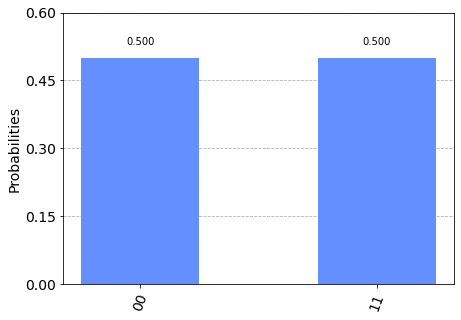

In [ ]:
plot_histogram(counts)

**Discussion: What do you notice about these histograms? Are they the same or different from the ones you saw last week for the entangled state?**

## Key takeaways:

1. Qiskit is an open-source Python library that allows us to create and run quantum circuits and algorithms

2. Quiskit Terra provides tools to build and manipulate quantum circuits. We use `QuantumCircuit(n)` to create a quantum circuit with `n` qubits

3. Qiskit Aer provides tools to simulate quantum circuits. `statevetor_simulator` is one simulation tool, that returns the exact state of the qubits at the output of the circuit.

4. We can add single qubit gates like H and X, and multi-qubit gates like CX, to the circuit using `<circuitname>.x(<qubit index>)`, `<circuitname>.h(<qubit index>)`, and `<circuitname>.cx(<control qubit index, target qubit index>)`

## Further reading and resources:
[The Qiskit textbook](https://qiskit.org/textbook/preface.html)


[List of qiskit resources](https://qiskit.org/learn)


[Quantum computing languages landscape](https://medium.com/@quantum_wa/quantum-computing-languages-landscape-1bc6dedb2a35)

[Qiskit tutorial](https://arxiv.org/pdf/1903.04359.pdf)